In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import keras
import sys
print('python: {}'.format(sys.version))
print('keras: {}'.format(keras.__version__))

In [3]:
#load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
#Lets determine the dataset characteristics
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
# A single image
print(x_train[0].shape)

(32, 32, 3)


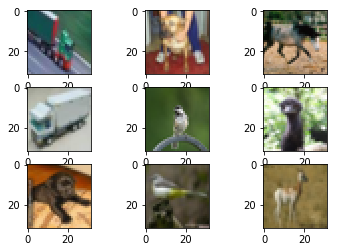

In [6]:
# create a grid of 3x3 images
for i in range(0,9):
	plt.subplot(330 + 1 + i)
	img = x_train[50 + i]
	plt.imshow(img)

#show the plot
plt.show()

In [7]:
# preprocessing the dataset

# fix random seed for reproducibility
seed=6
np.random.seed(seed)

#load the data
(x_train,y_train),(x_test,y_test) =cifar10.load_data()

#normalize the inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255.0
x_test /=255.0

In [8]:
#class label shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [9]:
#hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape[1]
print(num_class)

print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [10]:
#importing layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [11]:
def allcnn(weights = None):
    # define model type - Sequential
    model = Sequential()

    # add model layers
    model.add(Conv2D(96, (3,3), padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))


    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))


    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1), padding = 'valid'))


    # add Global Average Pooling Layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    #load the weights
    if weights:
        model.load_weights(weights)

    # return the model
    return model

In [12]:
# define hyper parameter
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#build model and pretrained weights
weights='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimzer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#print model summary
print(model.summary())


# define additional training parameters
#epochs = 350
#batch_size = 32


#fit the model
#model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
scores = model.evaluate(x_test, y_test, verbose = 1)
print('Accuracy: {}'.format(scores[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [13]:
#make dictionary of class labels and names
classes= range(0,10)

names = ['airplane','automobile','bird','cat'
,'deer','dog','frog','horse','ship','truck']

In [14]:
#zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))
print(class_labels)


#generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:100], axis = -1)

#make predictions
predictions = model.predict(batch, verbose = 1)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
9/9 [==============================] - 0s


In [15]:
#use np.argmax() to convert class probabilitis to class labels
class_results = np.argmax(predictions, axis=-1)
print(class_results)

[4 5 6 3 1 1 3 6 8]


In [16]:
#create a grid of 3x3 images
fig,axs = plt.subplots(3,3, figsize = (15,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i ,img in enumerate(batch):
    for key, values in class_labels.items():
        if class_results[i] == key:
            title = "prediction:{} \nActual: {}".format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_variable(False)
            axs[i].axes.get_yaxis().set_variable(False)

#plot the image
axs[i].imshow(img)

#show the plot
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0